Part 1 - Model

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)
313/313 [==============================] - 1s 3ms/step - loss: 2.4611 - accuracy: 0.0989
Initial test error: 0.9011000022292137
Epoch 1/100
391/391 [==============================] - 3s 5ms/step - loss: 1.9335 - accuracy: 0.3090 - val_loss: 1.7662 - val_accuracy: 0.3755
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 1.7158 - accuracy: 0.3874 - val_loss: 1.6948 - val_accuracy: 0.3955
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 1.6365 - accuracy: 0.4168 - val_loss: 1.5913 - val_accuracy: 0.4322
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 1.5660 - accuracy: 0.4451 - val_loss: 1.5495 - val_accuracy: 0.4490
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 1.5232 - accuracy: 0.4601 - val_loss: 1.5656 - val_accuracy: 0.4561
Epoch 6/100
391/391 [==============================] - 2s 6ms/step - loss: 1.4876 - accuracy: 0.4

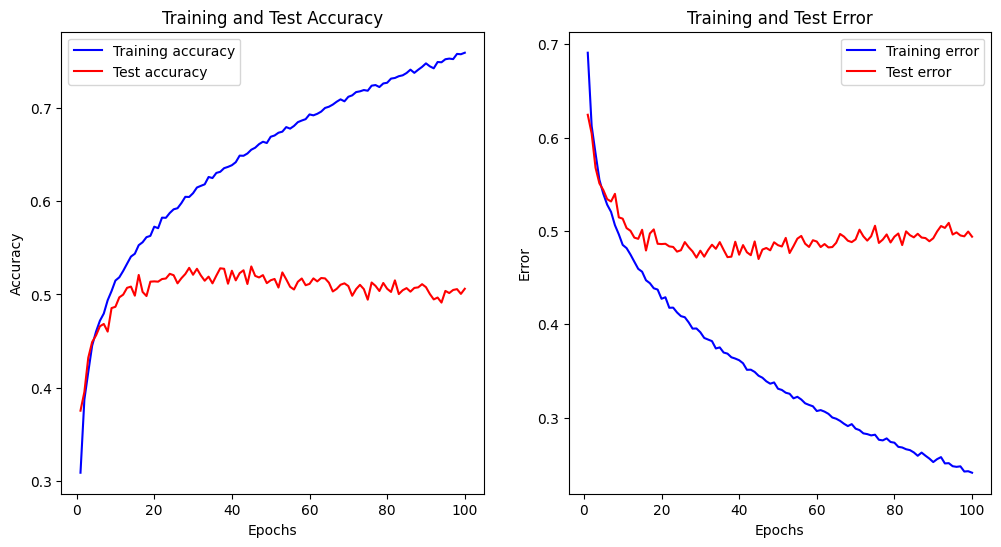

In [3]:
# PART 1 THE MODEL

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import math

from tensorflow import keras


lr = 0.001
n_epochs = 100

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


y_train = y_train.flatten();
y_test = y_test.flatten();

n_classes = 10
n_features = x_train[0,...].size
n_train = x_train.shape[0]
batch_size = 128

x_train, x_test = x_train.reshape([-1, n_features]), x_test.reshape([-1, n_features])

x_train = (x_train / 255.).astype(dtype=np.float32)
x_test = (x_test / 255).astype(dtype=np.float32)



n_classes = 10
n_features = x_train[0,...].size
n_train = x_train.shape[0]
batch_size = 128

#citerion= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#optimizer = tf.keras.optimizers.Adam(lr)

model = keras.Sequential(
    [
        keras.layers.Dense(512, input_shape=(n_features,), activation="relu", name="layer1"),
        keras.layers.Dense(128, activation="relu", name="layer2"),
        # we need to add softmax to last layer,
        # because model.compile(loss='sparse_categorical_crossentropy'
        # assumes from_logits=False, i.e., takes probabilities
        keras.layers.Dense(n_classes, activation="softmax", name="layer3"),
    ]
)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #optimizer=optimizer,
              #loss=citerion,
              metrics=['accuracy'])

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Initial test error:", 1 - test_acc)

# Train the model
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Final test error:", 1 - test_acc)

# Plot the model
epochs = range(1, n_epochs + 1)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'blue', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'red', label='Test accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, 1 - np.array(history.history['accuracy']), 'blue', label='Training error')
plt.plot(epochs, 1 - np.array(history.history['val_accuracy']), 'red', label='Test error')
plt.title('Training and Test Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

# MNIST code is to test that it's working correctly before testing on CIFAR10

The training accuracy curve is much higher than the test accuracy curve. This indicates that the model is overfitting the training data.
The test accuracy curve plateaus after a few epochs. This indicates that the model is no longer learning from the training data and is starting to overfit.
The test error curve increases after a few epochs. This confirms that the model is overfitting the training data.

Part 2 - Experiments

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)
313/313 [==============================] - 1s 2ms/step - loss: 2.6503 - accuracy: 0.1238
Initial test error: 0.8761999979615211
Epoch 1/100
391/391 [==============================] - 2s 4ms/step - loss: 1.9418 - accuracy: 0.3110 - val_loss: 1.8401 - val_accuracy: 0.3510
Epoch 2/100
391/391 [==============================] - 1s 3ms/step - loss: 1.8275 - accuracy: 0.3629 - val_loss: 1.7864 - val_accuracy: 0.3752
Epoch 3/100
391/391 [==============================] - 1s 3ms/step - loss: 1.7986 - accuracy: 0.3751 - val_loss: 1.7851 - val_accuracy: 0.3775
Epoch 4/100
391/391 [==============================] - 1s 3ms/step - loss: 1.7845 - accuracy: 0.3789 - val_loss: 1.7721 - val_accuracy: 0.3826
Epoch 5/100
391/391 [==============================] - 1s 4ms/step - loss: 1.7671 - accuracy: 0.3857 - val_loss: 1.8000 - val_accuracy: 0.3749
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 1.7572 - accuracy: 0.3

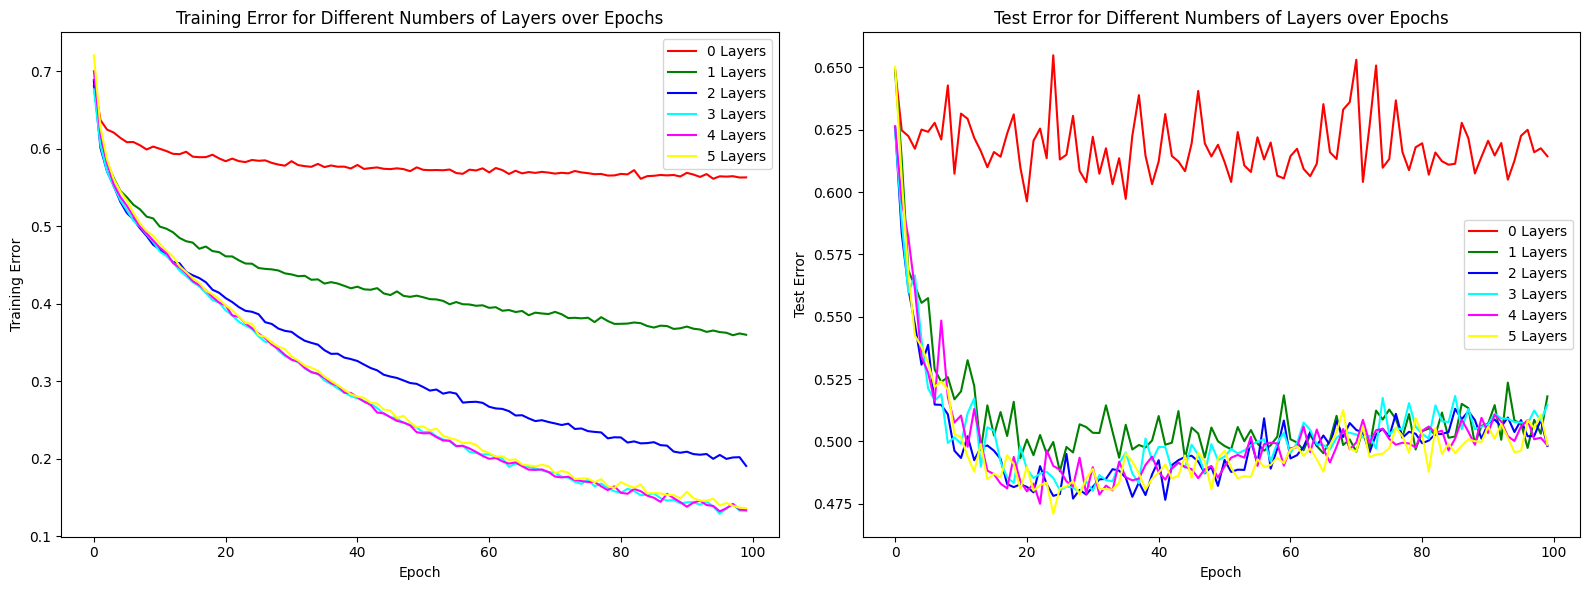

In [2]:
# PART 2 THE EXPERIMENTS

# CHANGING NUMBERS OF LAYERS

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import math

from tensorflow import keras


lr = 0.001
n_epochs = 100

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


y_train = y_train.flatten();
y_test = y_test.flatten();

n_classes = 10
n_features = x_train[0,...].size
n_train = x_train.shape[0]
batch_size = 128

x_train, x_test = x_train.reshape([-1, n_features]), x_test.reshape([-1, n_features])

x_train = (x_train / 255.).astype(dtype=np.float32)
x_test = (x_test / 255).astype(dtype=np.float32)



n_classes = 10
n_features = x_train[0,...].size
n_train = x_train.shape[0]
batch_size = 128

#citerion= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#optimizer = tf.keras.optimizers.Adam(lr)

"""model = keras.Sequential(
    [
        keras.layers.Dense(512, input_shape=(n_features,), activation="relu", name="layer1"),
        keras.layers.Dense(128, activation="relu", name="layer2"),
        # we need to add softmax to last layer,
        # because model.compile(loss='sparse_categorical_crossentropy'
        # assumes from_logits=False, i.e., takes probabilities
        keras.layers.Dense(n_classes, activation="softmax", name="layer3"),
    ]
)"""

layers = [0, 1, 2, 3, 4, 5]  # list of layers to experiment with. 0 hidden layers to 5
colors = ["red", "green", "blue", "cyan", "magenta", "yellow"]  # colors to separate each layer

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

for layer, color in zip(layers, colors):
    model = keras.Sequential()
    if layer == 0:
        model.add(keras.layers.Dense(n_classes, input_shape=(n_features,), activation="softmax"))
    else:
        model.add(keras.layers.Dense(512, input_shape=(n_features,), activation="relu"))
        for i in range(layer):
            if i == layer - 1:
                model.add(keras.layers.Dense(n_classes, activation="softmax"))
            else:  # if not last layer, add more layers
                model.add(keras.layers.Dense(256 // (2 ** i), activation="relu"))


    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  #optimizer=optimizer,
                  #loss=citerion,
                  metrics=['accuracy'])

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print("Initial test error:", 1 - test_acc)

    # Train the model
    history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_test, y_test))

    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print("Final test error:", 1 - test_acc)

    # Plot the model
    test_errors = [1 - acc for acc in history.history['val_accuracy']]
    train_errors = [1 - acc for acc in history.history['accuracy']]

    axes[0].plot(train_errors, linestyle='-', color=color, label=f'{layer} Layers')
    axes[1].plot(test_errors, linestyle='-', color=color, label=f'{layer} Layers')

axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Training Error')
axes[0].set_title('Training Error for Different Numbers of Layers over Epochs')
axes[0].legend()

axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Test Error')
axes[1].set_title('Test Error for Different Numbers of Layers over Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()



The graph indicates that 0 layers displays the highest error in both training and test data. The pattern shows that an increase in layers leads to a decrease in error.

391/391 [==============================] - 3s 8ms/step - loss: 1.1061 - accuracy: 0.6040 - val_loss: 1.4462 - val_accuracy: 0.5085
Epoch 23/100
391/391 [==============================] - 3s 6ms/step - loss: 1.0896 - accuracy: 0.6105 - val_loss: 1.4053 - val_accuracy: 0.5181
Epoch 24/100
391/391 [==============================] - 2s 5ms/step - loss: 1.0642 - accuracy: 0.6194 - val_loss: 1.4065 - val_accuracy: 0.5222
Epoch 25/100
391/391 [==============================] - 2s 6ms/step - loss: 1.0430 - accuracy: 0.6254 - val_loss: 1.3925 - val_accuracy: 0.5248
Epoch 26/100
391/391 [==============================] - 2s 6ms/step - loss: 1.0337 - accuracy: 0.6277 - val_loss: 1.4049 - val_accuracy: 0.5283
Epoch 27/100
391/391 [==============================] - 2s 5ms/step - loss: 1.0023 - accuracy: 0.6412 - val_loss: 1.4635 - val_accuracy: 0.5184
Epoch 28/100
391/391 [==============================] - 3s 7ms/step - loss: 0.9912 - accuracy: 0.6445 - val_loss: 1.4404 - val_accuracy: 0.5279
Epoch

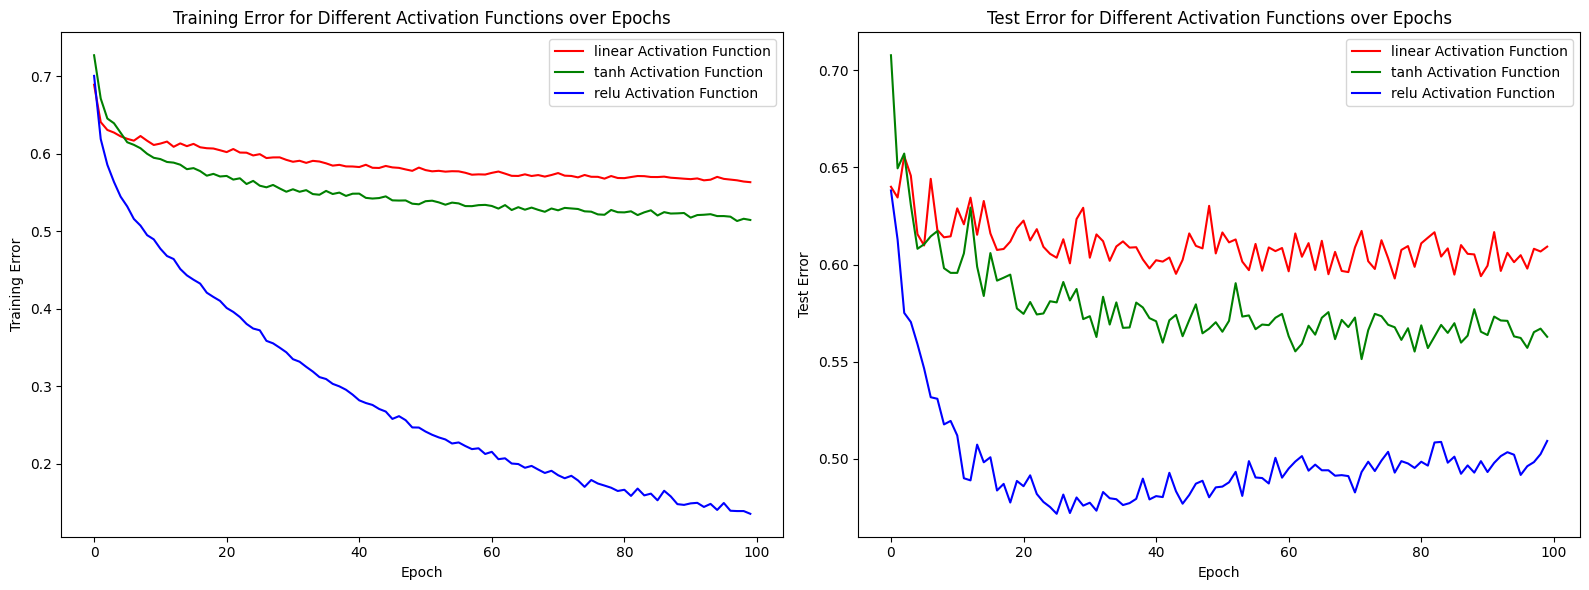

In [1]:
# CHANGING ACTIVATION FUNCTION


import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import math

from tensorflow import keras


lr = 0.001
n_epochs = 100

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


y_train = y_train.flatten()
y_test = y_test.flatten()

n_classes = 10
n_features = x_train[0,...].size
n_train = x_train.shape[0]
batch_size = 128

x_train, x_test = x_train.reshape([-1, n_features]), x_test.reshape([-1, n_features])

x_train = (x_train / 255.).astype(dtype=np.float32)
x_test = (x_test / 255).astype(dtype=np.float32)



n_classes = 10
n_features = x_train[0,...].size
n_train = x_train.shape[0]
batch_size = 128

#citerion= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#optimizer = tf.keras.optimizers.Adam(lr)

"""model = keras.Sequential(
    [
        keras.layers.Dense(512, input_shape=(n_features,), activation="relu", name="layer1"),
        keras.layers.Dense(128, activation="relu", name="layer2"),
        # we need to add softmax to last layer,
        # because model.compile(loss='sparse_categorical_crossentropy'
        # assumes from_logits=False, i.e., takes probabilities
        keras.layers.Dense(n_classes, activation="softmax", name="layer3"),
    ]
)"""

activation_function = ["linear", "tanh", "relu"]  # list of activation functions
colors = ["red", "green", "blue"]  # colors to separate each function

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

for activation, color in zip(activation_function, colors):
    model = keras.Sequential()
    model.add(keras.layers.Dense(512, input_shape=(n_features,), activation=activation))
    model.add(keras.layers.Dense(256, activation=activation))
    model.add(keras.layers.Dense(128, activation=activation))
    model.add(keras.layers.Dense(64, activation=activation))
    model.add(keras.layers.Dense(32, activation=activation))
    model.add(keras.layers.Dense(n_classes, activation="softmax"))

    print(model.summary())  # check model layers

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  #optimizer=optimizer,
                  #loss=citerion,
                  metrics=['accuracy'])

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print("Initial test error:", 1 - test_acc)

    # Train the model
    history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_test, y_test))

    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print("Final test error:", 1 - test_acc)

    # Plot the model
    test_errors = [1 - acc for acc in history.history['val_accuracy']]
    train_errors = [1 - acc for acc in history.history['accuracy']]

    axes[0].plot(train_errors, linestyle='-', color=color, label=f'{activation} Activation Function')
    axes[1].plot(test_errors, linestyle='-', color=color, label=f'{activation} Activation Function')

axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Training Error')
axes[0].set_title('Training Error for Different Activation Functions over Epochs')
axes[0].legend()

axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Test Error')
axes[1].set_title('Test Error for Different Activation Functions over Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()

The model with the ReLU activation function is performing better than the model with the tanh activation function. The ReLU activation function is less likely to overfit the training data and generalizes better to new data. the linear activation function displays more error compared to tanh and relu funcitons.